In [2]:
from pathlib import Path
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas
from datetime import datetime
from dateutil import tz
import glob

%matplotlib inline

In [3]:
hurricane_winds = geopandas.read_file(glob.glob('data/wsp_120hr5km_latest/*_wsp64knt120hr_5km.shp')[0])

In [4]:
map_crs = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

In [5]:
plot_colors = {
    '<5%': '#ffeda0',
    '5-10%': '#ffeda0',
    '10-20%': '#ffeda0',
    '20-30%': '#ffeda0',
    '30-40%': '#feb24c',
    '40-50%': '#feb24c',
    '50-60%': '#feb24c',
    '60-70%': '#feb24c',
    '70-80%': '#f03b20',
    '80-90%': '#f03b20',
    '>90%': '#f03b20',
}

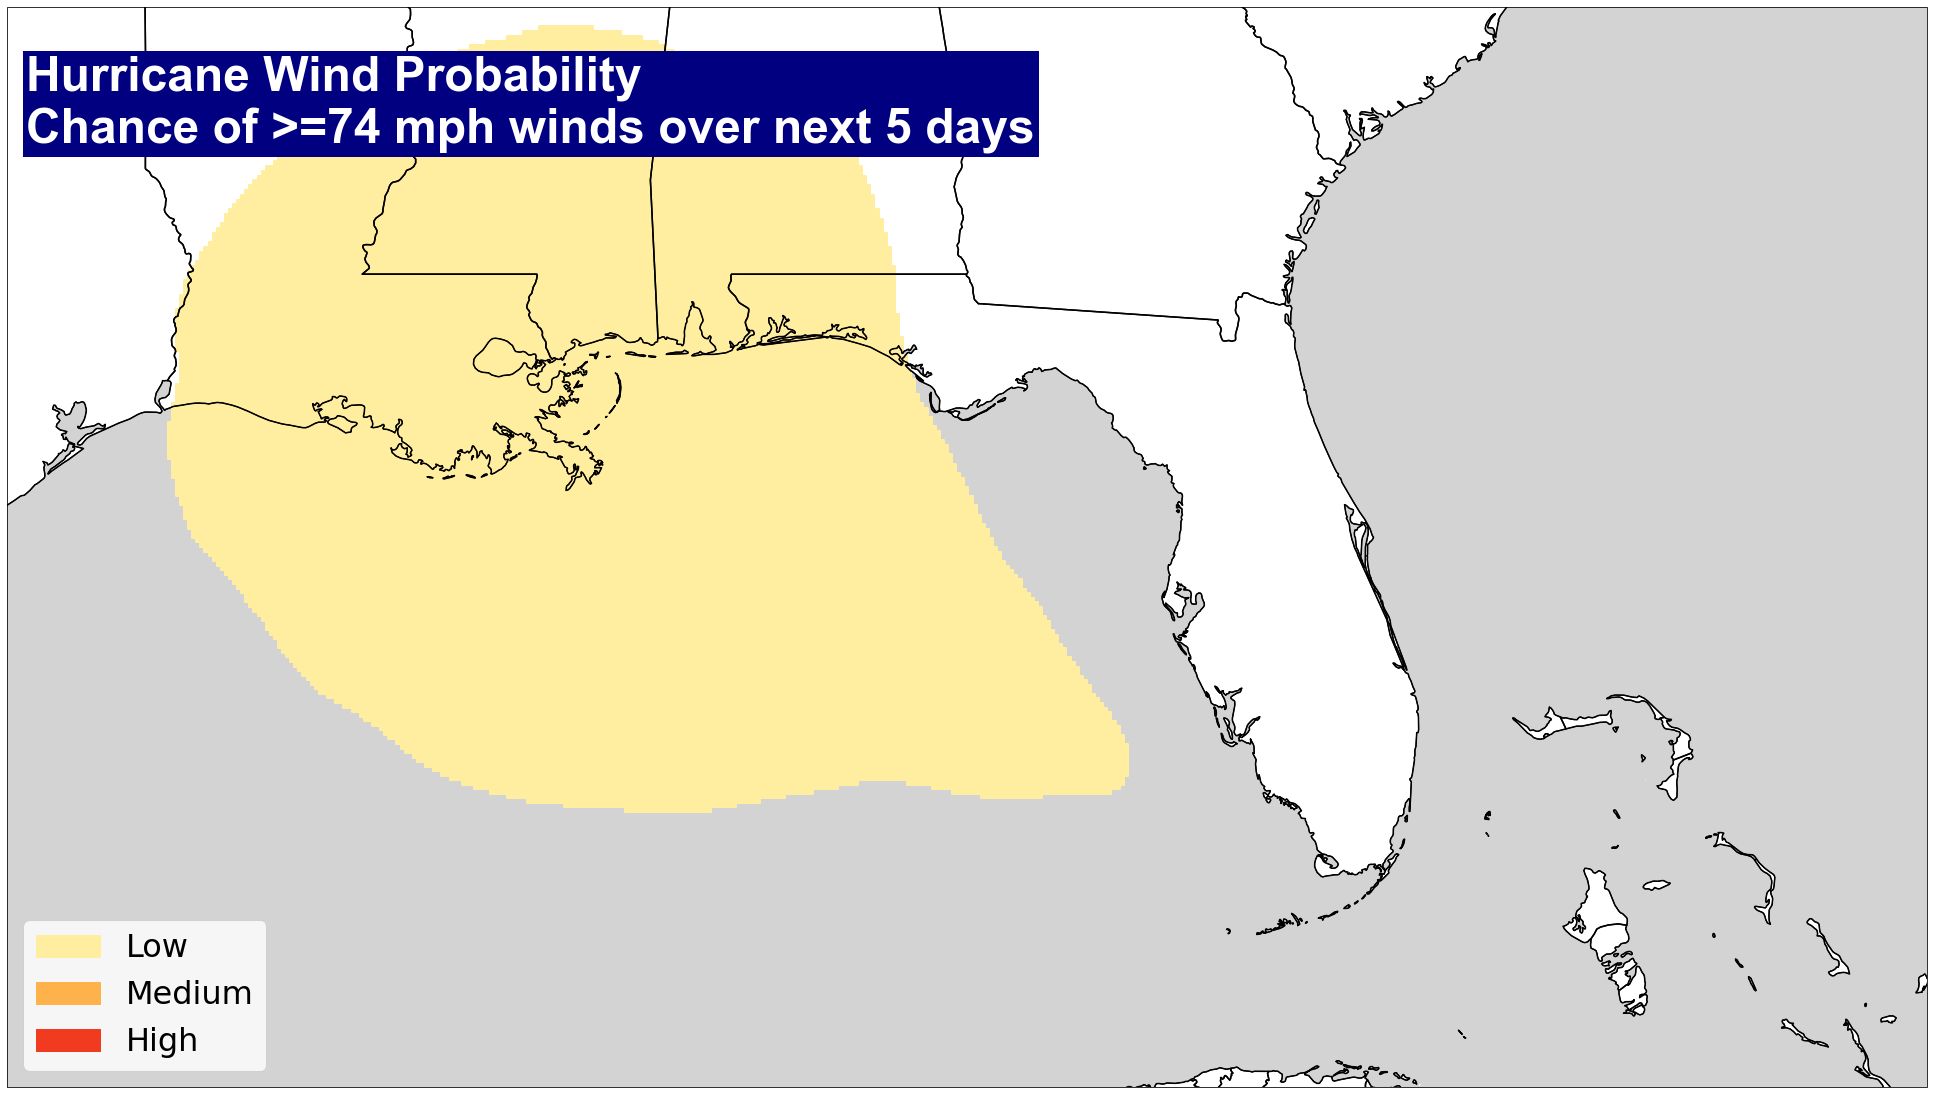

In [6]:
# Setup and display matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=map_crs)
ax.set_adjustable('datalim')

ax.set_title('Hurricane Wind Probability\nChance of >=74 mph winds over next 5 days', loc='left', 
             ha='left', va='top', fontsize=48, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.01,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))


ax.set_extent([-95, -42, 10.0, 35.0], ccrs.PlateCarree())
ax.set_extent([-95, -75, 23, 33.5], ccrs.PlateCarree())
ax.set_extent([-100, -10, 5, 42], ccrs.PlateCarree())
ax.set_extent([-95, -75, 23, 33.5], data_crs)

ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')

low_risk = mpatches.Patch(color='#ffeda0', label='Low')
medium_risk = mpatches.Patch(color='#feb24c', label='Medium')
high_risk = mpatches.Patch(color='#f03b20', label='High')
ax.legend(handles=[low_risk, medium_risk, high_risk], loc='lower left', fontsize=32)

'''
Plot the probabilities
'''
for key in plot_colors.keys():
    geometries = hurricane_winds[hurricane_winds['PERCENTAGE'] == key]
    if len(geometries) > 0:
        ax.add_geometries(geometries['geometry'], crs=data_crs, facecolor=plot_colors[key], zorder=0)
        ax.add_geometries(geometries['geometry'], crs=data_crs, facecolor='none', edgecolor=plot_colors[key], linewidth=2, zorder=0)

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'nhc'
plt.savefig(f'{graphics_dir}/wind_speed_probabilities_64kt.png', dpi=72)

<Figure size 432x288 with 0 Axes>